In [56]:
# general 
import datetime

# data analysis and wrangling
import pandas as pd

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# pickling
import pickle

%matplotlib inline

### Static Variables

In [57]:
line = "15"

### Reading Dataframe

In [58]:
#Read in the data from a csv file using Pandas
df = pd.read_csv("bus_data/line_data/" + line + ".csv", low_memory=False, header=None)
df.columns = ["Timestamp", "LineID", "JourneyPatternID", "TimeFrame", 
              "VehicleJourneyID", "Lon", "Lat", "VehicleID", "StopID", 
              "AtStop", "HumanTime", "Day", "Hour", "Runtime"]

In [59]:
stop_6282 = df[df.StopID == 6282]
stop_6282

,Timestamp,LineID,JourneyPatternID,TimeFrame,VehicleJourneyID,Lon,Lat,VehicleID,StopID,AtStop,HumanTime,Day,Hour,Runtime
145,1352185249000000,15,1,2012-11-06,5899,-6.323400,53.271549,33498,6282,1,2012-11-06 07:00:49,1,7,3004
218,1352186331000000,15,1,2012-11-06,5902,-6.314483,53.273048,33620,6282,1,2012-11-06 07:18:51,1,7,3545
343,1352187770000000,15,1,2012-11-06,5900,-6.323417,53.271549,33498,6282,1,2012-11-06 07:42:50,1,7,0
421,1352188432000000,15,1,2012-11-06,5903,-6.324633,53.271484,33620,6282,1,2012-11-06 07:53:52,1,7,0
466,1352188852000000,15,1,2012-11-06,5920,-6.328650,53.271416,33502,6282,1,2012-11-06 08:00:52,1,8,4866
477,1352188914000000,15,1,2012-11-06,5930,-6.328550,53.271317,33515,6282,1,2012-11-06 08:01:54,1,8,4365
521,1352189331000000,15,1001,2012-11-06,5912,-6.331183,53.276299,33621,6282,1,2012-11-06 08:08:51,1,8,4706
559,1352189694000000,15,1001,2012-11-06,5921,-6.328883,53.271618,33502,6282,1,2012-11-06 08:14:54,1,8,0
587,1352189934000000,15,1,2012-11-06,5937,-6.328400,53.271217,33516,6282,1,2012-11-06 08:18:54,1,8,4963
635,1352190353000000,15,1,2012-11-06,5931,-6.328516,53.271301,33515,6282,1,2012-11-06 08:25:53,1,8,0


### Training on entire dataset

In [60]:
# Setting up descriptive & target features

features = ["Day", "Hour", "StopID", 'LineID', 'JourneyPatternID']

X = pd.concat([df[features]], axis=1)
y = df.Runtime

X.head()

,Day,Hour,StopID,LineID,JourneyPatternID
0,1,6,6319,15,1
1,1,6,4594,15,1
2,1,6,4595,15,1
3,1,6,1153,15,1001
4,1,6,4596,15,1


In [76]:
rfc = RandomForestRegressor(n_estimators=100, max_features='auto', oob_score=True, random_state=1)

In [77]:
rfc.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [78]:
rfc_predictions = rfc.predict(X)

In [79]:
# print("Accuracy: ", metrics.accuracy_score(y, rfc_predictions))
# print("Confusion matrix: \n", metrics.confusion_matrix(y, rfc_predictions))
# print("Classification report:\n ", metrics.classification_report(y, rfc_predictions))

print("R Squared: ", metrics.r2_score(y, rfc_predictions))
print("neg_mean_absolute_error: ", metrics.mean_absolute_error(y, rfc_predictions))
print("mean_squared_error: ", metrics.mean_squared_error(y, rfc_predictions))
print("median_absolute_error: ", metrics.median_absolute_error(y, rfc_predictions))

R Squared:  0.860544220313
neg_mean_absolute_error:  339.402197959
mean_squared_error:  333904.553536
median_absolute_error:  209.937324922


In [80]:
true_v_pred = pd.DataFrame({'Actual Value': y, 'Predicted Value': rfc_predictions, 'Hour': df.Hour, 'Day': df.Day})
true_v_pred

,Actual Value,Day,Hour,Predicted Value
0,0,1,6,132.016496
1,181,1,6,288.281988
2,260,1,6,372.757626
3,0,1,6,358.871568
4,300,1,6,402.389971
5,359,1,6,481.591927
6,99,1,6,413.985687
7,440,1,6,555.833013
8,522,1,6,619.846134
9,0,1,6,132.016496


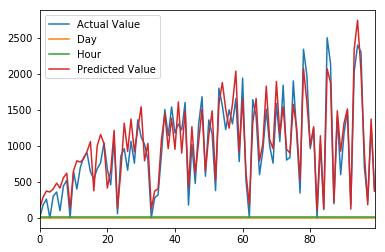

In [81]:
true_v_pred.head(100).plot()

In [82]:
# pickling the model to be used later
filename = 'line15_all_RF.sav'
pickle.dump(rfc, open(filename, 'wb'))

In [29]:
# pulling the pickled model, to test with

In [30]:
# pickled_rfc = pickle.load(open(filename, 'rb'))

In [31]:
# new dataframe

# info = [{
#     'Day': 3,
#     'Hour': 8,
#     'StopID': 4596,
# }]
# single_df = pd.DataFrame(info)

# single_df = pd.DataFrame({'Day': 5, 'Hour': 3, 'StopID': 4596})
# single_df = pd.DataFrame.from_dict(info, orient='columns')


# new_predictions = pickled_rfc.predict(single_df)

In [32]:
# print(type(new_predictions[0]))

### Train-test split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [34]:
# Fit model on training dataset
rfc.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [35]:
# Predicted class labels for test examples, 
rfc_predictions = rfc.predict(X_test)

In [36]:
# Accuracy metrics

print("R Squared: ", metrics.r2_score(y_test, rfc_predictions))
print("neg_mean_absolute_error: ", metrics.mean_absolute_error(y_test, rfc_predictions))
print("mean_squared_error: ", metrics.mean_squared_error(y_test, rfc_predictions))
print("median_absolute_error: ", metrics.median_absolute_error(y_test, rfc_predictions))

R Squared:  0.845327631031
neg_mean_absolute_error:  364.300517232
mean_squared_error:  370478.201214
median_absolute_error:  228.771748365


In [37]:
true_v_pred = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': rfc_predictions})
true_v_pred = true_v_pred.reset_index()
true_v_pred = true_v_pred.drop('index', 1)
true_v_pred

,Actual Value,Predicted Value
0,1791,1768.348261
1,4281,4765.392171
2,397,459.545833
3,339,455.134458
4,2900,2552.105773
5,1019,2882.318685
6,5622,5188.928698
7,2768,3463.422848
8,121,289.111786
9,4427,4711.487828


In [83]:
correct = 0
window = 150

for index, row in true_v_pred.iterrows():
    tolerance = range(int(row['Predicted Value']) - window, int(row['Predicted Value']) + window)
    if (row['Actual Value'] >= tolerance[0]) and (row['Actual Value'] <= tolerance[-1]):
        correct += 1

accuracy = correct / len(true_v_pred)
print (accuracy)

0.38299483130390666


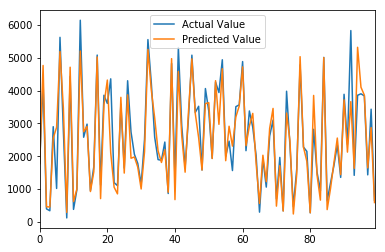

In [39]:
# Plotting predicted vs actual runtime on a training set
true_v_pred.head(100).plot()